In [1]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


ModuleNotFoundError: No module named 'shap'

In [2]:
# 05_dashboard_and_summary.ipynb

import pandas as pd
import joblib
import plotly.express as px
import os

# 1. Load cleaned data
df = pd.read_csv("data/cleaned_telco_data.csv")

# 2. Load saved model and label encoders
model = joblib.load("outputs/churn_rf_model.pkl")
label_encoders = joblib.load("outputs/label_encoders.pkl")

# 3. Encode categorical features in df using label_encoders (same as training)
df_encoded = df.copy()
for col, le in label_encoders.items():
    if col in df_encoded.columns:
        df_encoded[col] = le.transform(df_encoded[col])

# 4. Predict churn probabilities and classes
X = df_encoded.drop('Churn', axis=1)
df['PredictedChurn'] = model.predict(X)
df['PredictedChurnProb'] = model.predict_proba(X)[:, 1]

# 5. Plotly visualizations

# Churn by Contract Type
fig1 = px.histogram(df, x="Contract", color="Churn",
                    title="Actual Churn by Contract Type",
                    barmode="group",
                    category_orders={"Contract": ["Month-to-month", "One year", "Two year"]})

# MonthlyCharges distribution vs Churn
fig2 = px.box(df, x="Churn", y="MonthlyCharges",
              title="Monthly Charges Distribution by Churn")

# Feature importances from model
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
fig3 = px.bar(feat_imp_df.head(10), x='Importance', y='Feature', orientation='h',
              title="Top 10 Feature Importances")
fig3.update_layout(yaxis={'categoryorder':'total ascending'})

# 6. Save dashboard HTML combining plots (basic example)
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, subplot_titles=("Actual Churn by Contract Type",
                                                    "Monthly Charges Distribution by Churn",
                                                    "Top 10 Feature Importances"))

for trace in fig1['data']:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2['data']:
    fig.add_trace(trace, row=2, col=1)
for trace in fig3['data']:
    fig.add_trace(trace, row=3, col=1)

fig.update_layout(height=900, showlegend=True, title_text="Telco Customer Churn Dashboard")

os.makedirs("outputs", exist_ok=True)
fig.write_html("outputs/final_churn_dashboard.html")

print("Dashboard saved to outputs/final_churn_dashboard.html")


FileNotFoundError: [Errno 2] No such file or directory: 'data/cleaned_telco_data.csv'

In [3]:
import os
print(os.path.isfile("data/cleaned_telco.csv"))  # Should print True


True


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Copy data to avoid modifying original
df_encoded = df.copy()

# 2. Encode categorical features
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 3. Split features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Predict & evaluate
y


NameError: name 'df' is not defined

In [5]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 52.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 51.5 MB/s eta 0:00:00:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/7 [numpy]
      Successfully uninstalled numpy-2.3.1━━━━━━━━━━━━━━━━━━━━ 2/7 [numpy]
   ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/7 [numpy]  WARNING: The scripts f2py and numpy-config are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [shap]

In [6]:
df = pd.read_csv("data/cleaned_telco.csv")


In [7]:
import pandas as pd

df = pd.read_csv("data/cleaned_telco.csv")  # adjust path & filename as needed


Accuracy: 0.7934705464868701

Confusion Matrix:
 [[936  99]
 [192 182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



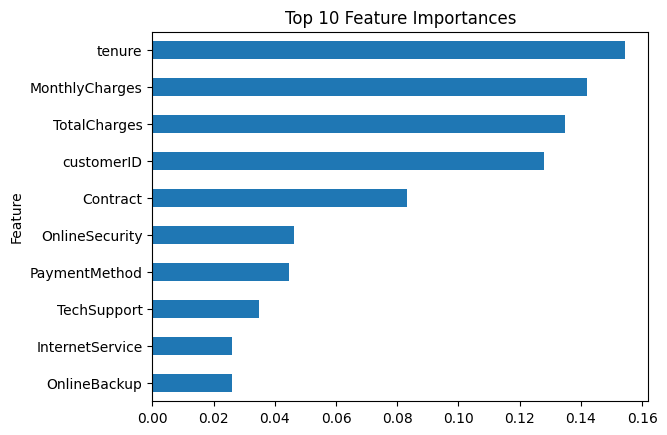

In [8]:
# === 1. Import libraries ===
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import matplotlib.pyplot as plt
import plotly.express as px

# === 2. Load cleaned data ===
df = pd.read_csv("data/cleaned_telco.csv")

# === 3. Encode categorical features ===
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# === 4. Prepare features and target ===
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# === 5. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# === 6. Train model ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# === 7. Evaluate model ===
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === 8. Feature Importance plot ===
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp_df.head(10).plot(
    kind='barh', x='Feature', y='Importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()

# === 9. Save model and label encoders ===
os.makedirs("outputs", exist_ok=True)
joblib.dump(model, "outputs/churn_rf_model.pkl")
joblib.dump(label_encoders, "outputs/label_encoders.pkl")

# === 10. Generate predictions on full dataset for dashboard ===
df['Predicted_Churn'] = model.predict(X)

# === 11. Create simple dashboard and save ===
fig = px.histogram(df, x='Contract', color='Churn', title='Churn by Contract Type')
fig.write_html("outputs/final_churn_dashboard.html")
